(iir-filters)=
# IIR filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget

## Create an IIR filter

The user creates an IIR filter with the {obj}`sdr.IIR` class by specifying the feedforward coefficients $b_i$
and feedback coefficients $a_j$.
Alternatively, an IIR filter may be created by specifying the zeros and poles in {obj}`sdr.IIR.ZerosPoles`.

Below is an IIR filter with one real zero and two complex-conjugate poles.

In [2]:
zero = 0.6
pole = 0.8 * np.exp(1j * np.pi / 8)
iir = sdr.IIR.ZerosPoles([zero], [pole, pole.conj()])
print(iir)

In [3]:
print(f"Feedforward taps: {iir.b_taps}")
print(f"Feedback taps: {iir.a_taps}")

Feedforward taps: [ 1.  -0.6]
Feedback taps: [ 1.         -1.47820725  0.64      ]


## Examine the impulse response, $h[n]$

The impulse response of the IIR filter is computed and returned from the {meth}`sdr.IIR.impulse_response()` method.
The impulse response $h[n]$ is the output of the filter when the input is an impulse $\delta[n]$.

In [4]:
h = iir.impulse_response(30)
print(h)

[ 1.00000000e+00  8.78207252e-01  6.58172329e-01  4.10862468e-01
  1.86109590e-01  1.21565653e-02 -1.01140214e-01 -1.57286400e-01
 -1.67772160e-01 -1.47338728e-01 -1.10422993e-01 -6.89312837e-02
 -3.12240078e-02 -2.03953322e-03  1.69685122e-02  2.63882791e-02
  2.81474977e-02  2.47193366e-02  1.85259041e-02  1.15647504e-02
  5.23851924e-03  3.42176895e-04 -2.84684395e-03 -4.42721858e-03
 -4.72236648e-03 -4.14721649e-03 -3.10813095e-03 -1.94024315e-03
 -8.78877688e-04 -5.74077567e-05]


The impulse response is conveniently plotted using the {obj}`sdr.plot.impulse_response()` function.

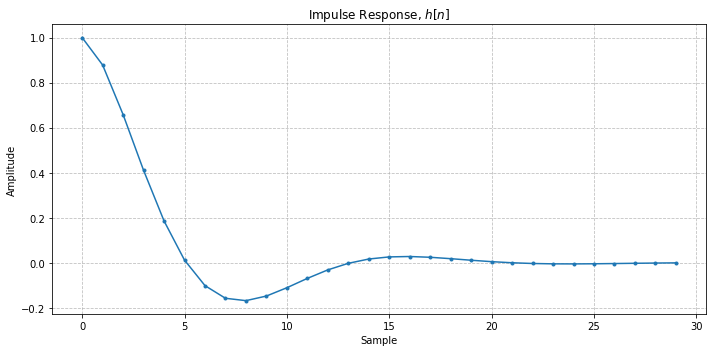

In [5]:
plt.figure(figsize=(10, 5))
sdr.plot.impulse_response(iir, 30, marker=".")
plt.show()

## Examine the step response, $s[n]$

The step response of the IIR filter is computed and returned from the {meth}`sdr.IIR.step_response()` method.
The step response $s[n]$ is the output of the filter when the input is a unit step $u[n]$.

In [6]:
s = iir.step_response(30)
print(s)

[1.         1.87820725 2.53637958 2.94724205 3.13335164 3.1455082
 3.04436799 2.88708159 2.71930943 2.5719707  2.46154771 2.39261642
 2.36139242 2.35935288 2.3763214  2.40270968 2.43085717 2.45557651
 2.47410241 2.48566716 2.49090568 2.49124786 2.48840102 2.4839738
 2.47925143 2.47510421 2.47199608 2.47005584 2.46917696 2.46911955]


The step response is conveniently plotted using the {obj}`sdr.plot.step_response()` function.

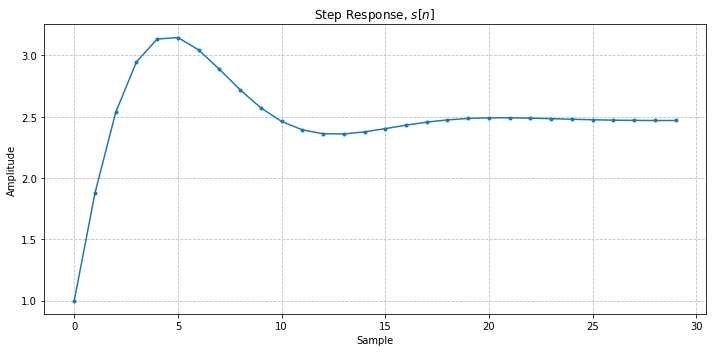

In [7]:
plt.figure(figsize=(10, 5))
sdr.plot.step_response(iir, 30, marker=".")
plt.show()

## Examine the zeros and poles

Zeros are $z$ values that set the numerator of $H(z)$ to zero.

In [8]:
print(iir.zeros)

[0.6]


Poles are $z$ values that set the denominator of $H(z)$ to zero.
The poles define the stability of the IIR filter.

In [9]:
print(iir.poles)

[0.73910363+0.30614675j 0.73910363-0.30614675j]


The zeros and poles are conveniently plotted in the complex plane using the {obj}`sdr.plot.zeros_poles()` function.

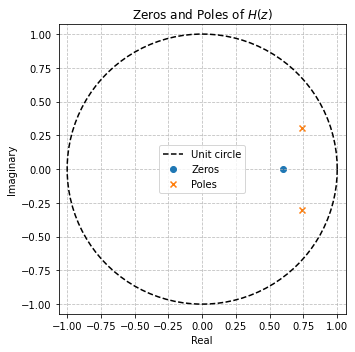

In [10]:
plt.figure(figsize=(5, 5))
sdr.plot.zeros_poles(iir)
plt.show()

## Examine the frequency response, $H(\omega)$

The frequency response is the transfer function $H(z)$ evaluated at the complex exponential
$e^{j \omega}$, where $\omega = 2 \pi f / f_s$.

The two-sided frequency response is conveniently plotted using the {obj}`sdr.plot.frequency_response()` function.

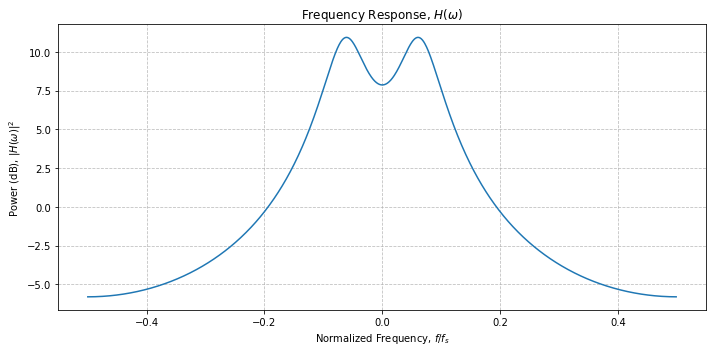

In [11]:
plt.figure(figsize=(10, 5))
sdr.plot.frequency_response(iir)
plt.show()

The one-sided frequency response, with logarithmic scale, can be plotted using the `x_axis="log"` keyword argument.

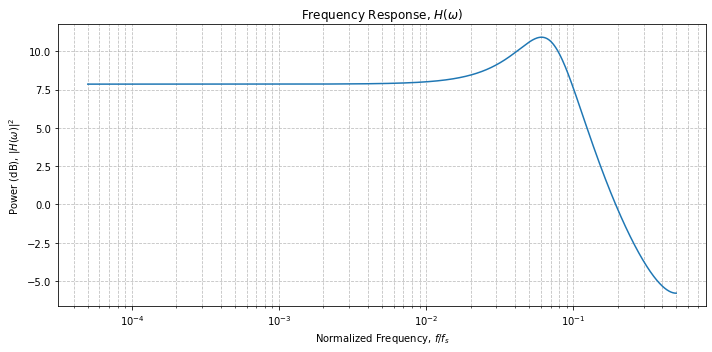

In [12]:
plt.figure(figsize=(10, 5))
sdr.plot.frequency_response(iir, x_axis="log")
plt.show()

## Examine the group delay, $\tau_g(\omega)$

The group delay $\tau_g(\omega)$ is the time shift of the envelope of a signal passed through the filter
as a function of its frequency $\omega$.

The group delay is conveniently plotted using the {obj}`sdr.plot.group_delay()` function.

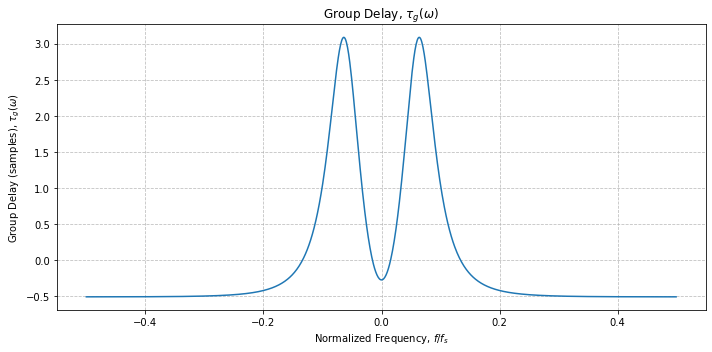

In [13]:
plt.figure(figsize=(10, 5))
sdr.plot.group_delay(iir)
plt.show()

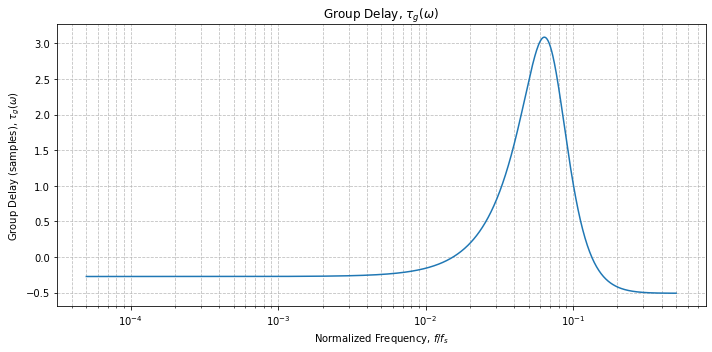

In [14]:
plt.figure(figsize=(10, 5))
sdr.plot.group_delay(iir, x_axis="log")
plt.show()

## Fully analyze an IIR filter

The user can easily analyze the perform of a given IIR filter using the {obj}`sdr.plot.filter()` function.

Here is an IIR filter with one real zero and 8 complex poles.

In [15]:
zeros = np.array([0.8])
poles = 0.6 * np.exp(1j * np.linspace(np.pi / 8, np.pi / 4, 4, endpoint=False))
poles = np.concatenate((poles, poles.conj()))
iir = sdr.IIR.ZerosPoles(zeros, poles)
print(iir)

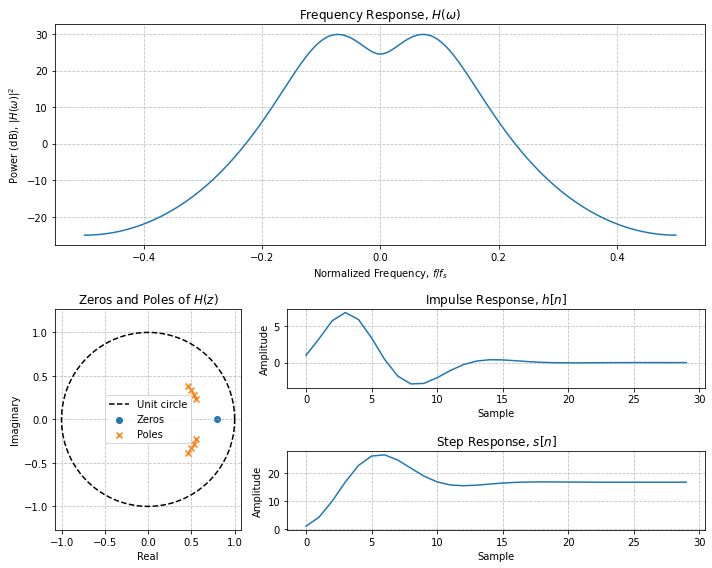

In [16]:
plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

## Poles and digital filter stability

Reference:
- R. Lyons, Understanding Digital Signal Processing 3rd Edition, Section 6.3.1.

When the pole is real and inside the unit circle, the impulse response $h[n]$ is an exponential decay.

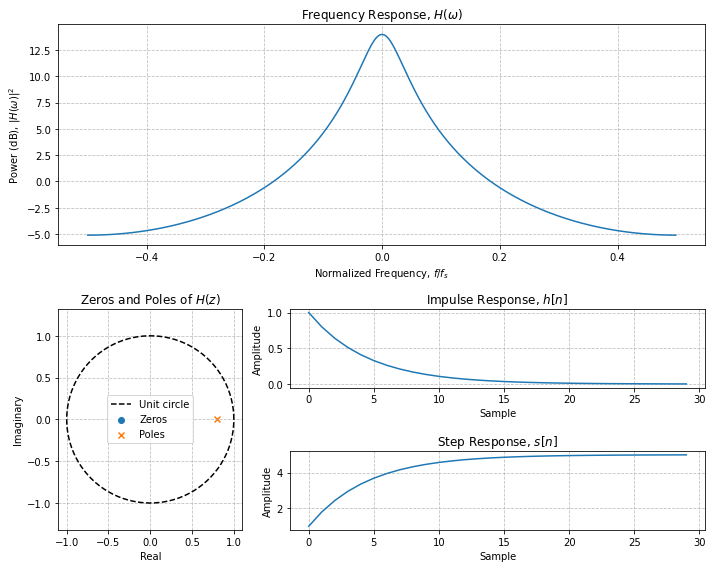

In [17]:
zeros = []
poles = [0.8]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

When the poles are complex conjugates and inside the unit circle, the impulse response $h[n]$ is a decaying sinusoid.

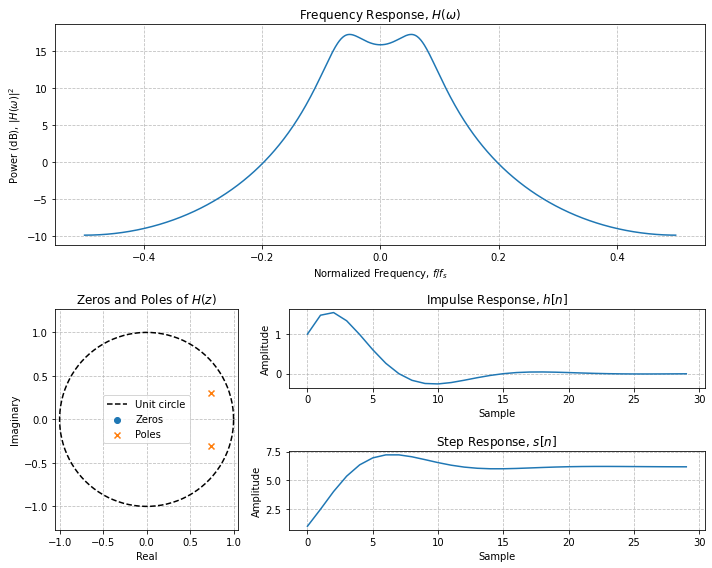

In [18]:
zeros = []
pole = 0.8 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

When the pole is real and on the unit circle, the impulse response $h[n]$ is constant.
This filter is an integrator.

C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: divide by zero encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


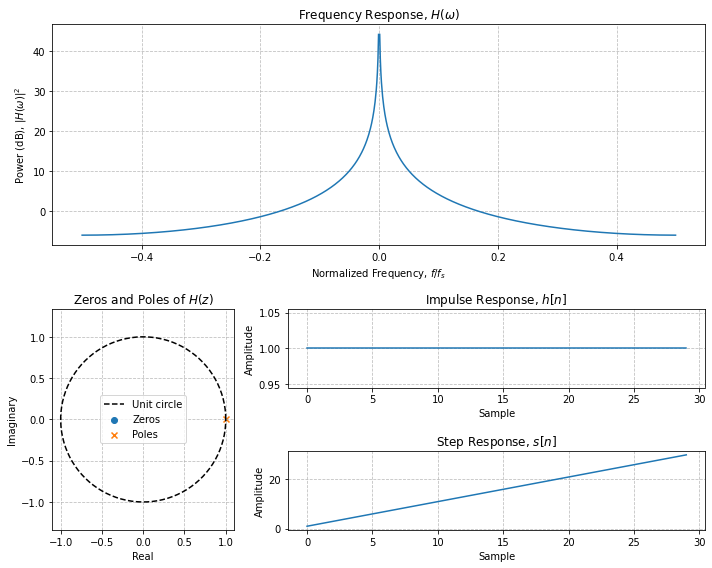

In [19]:
zeros = []
poles = [1]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

When the poles are complex conjugates and on the unit circle, the impulse response $h[n]$ is a sinusoid.

C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: divide by zero encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


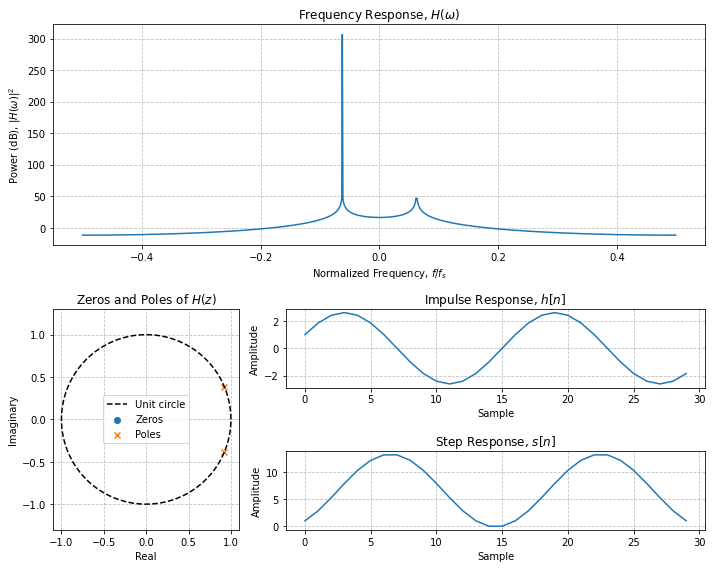

In [20]:
zeros = []
pole = 1 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

When the pole is real and outside the unit circle, the impulse response $h[n]$ is an exponential.
This filter is unstable.

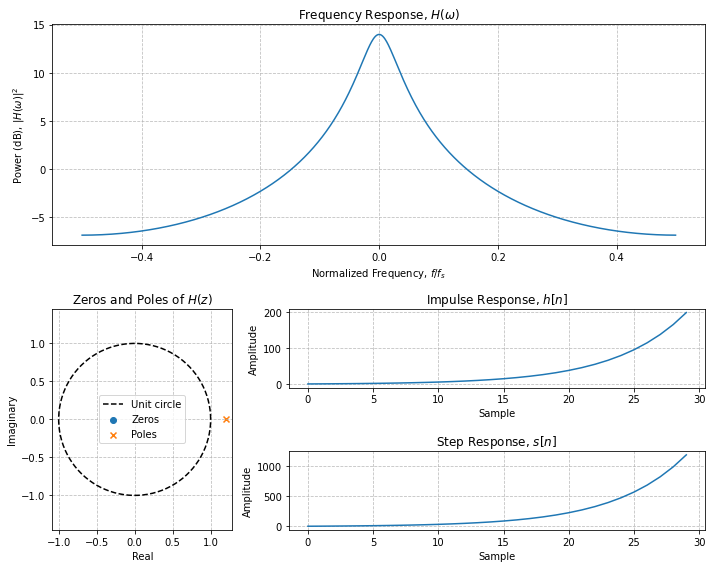

In [21]:
zeros = []
poles = [1.2]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()

When the poles are complex conjugates and outside the unit circle,
the impulse response $h[n]$ is an exponentially-increasing sinusoid.
This filter is unstable.

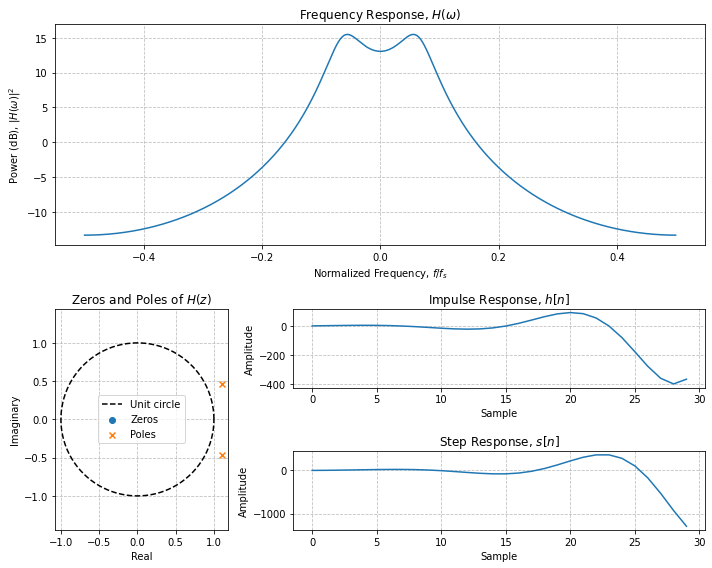

In [22]:
zeros = []
pole = 1.2 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
sdr.plot.filter(iir, N_time=30)
plt.show()